In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [86]:
data = pd.read_csv('/kaggle/input/wine-dataset-for-clustering/wine-clustering.csv')
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


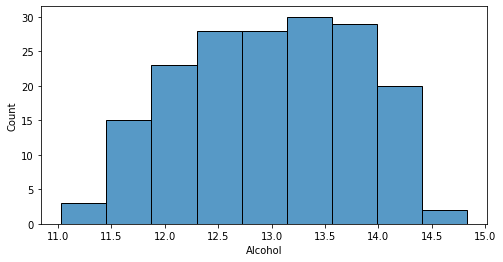

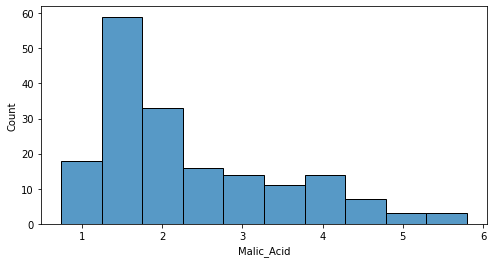

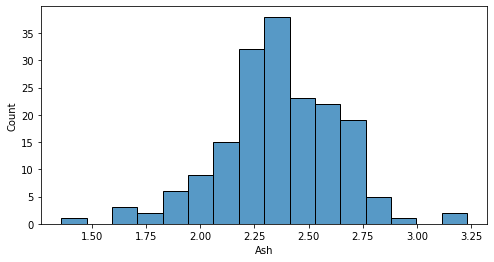

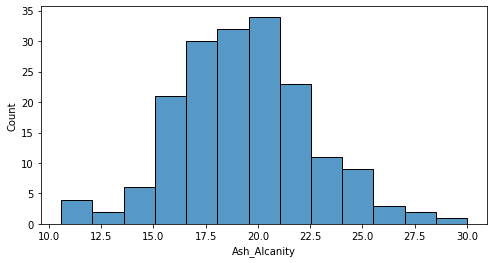

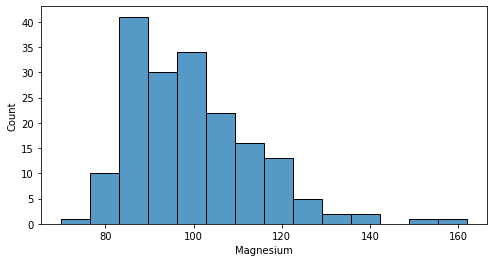

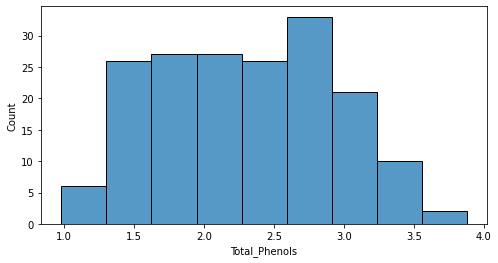

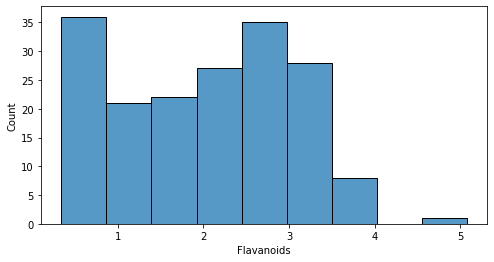

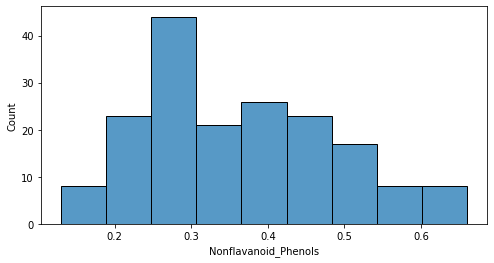

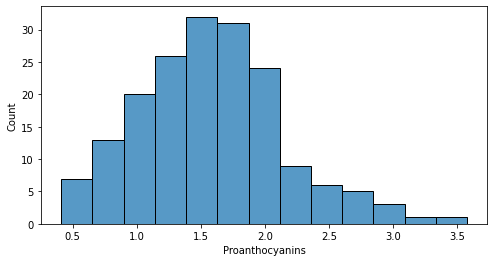

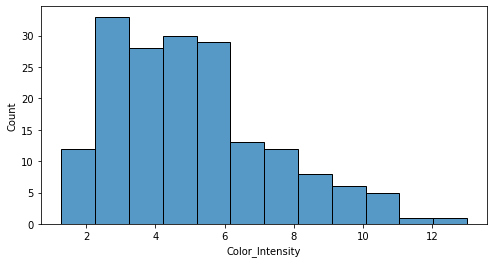

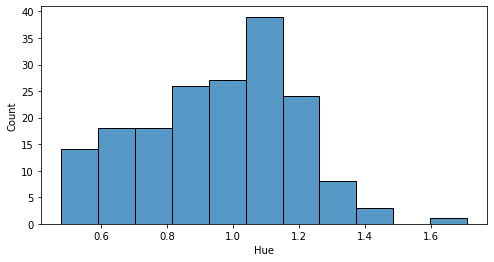

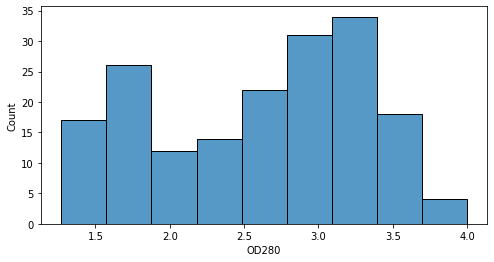

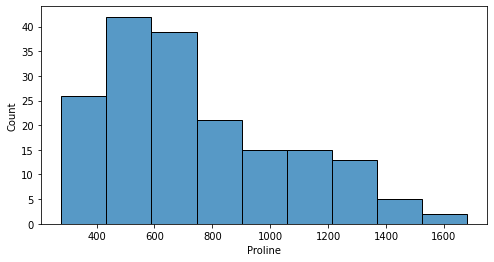

In [6]:
for numerical in data:
    plt.figure(figsize=(8,4))
    sns.histplot(data=data, x=numerical)
    plt.savefig(numerical + '.png')

In [7]:
from sklearn.neighbors import KNeighborsRegressor
import scipy.stats
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [145]:
def calculate_skew_normality(data):
    skew_df = pd.DataFrame(data.select_dtypes(np.number).columns, columns=['Feature'])
    skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(data[feature]))
    skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
    skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
    skew_df['normal'] = skew_df['Feature'].apply(lambda feature: stats.normaltest(data[feature])[1])
    skew_df['Normality'] = skew_df['normal'].apply(lambda x: True if x >= 0.05 else False)
    return skew_df

In [146]:
calculate_skew_normality(data)

,Feature,Skew,Absolute Skew,Skewed,normal,Normality
0,Alcohol,-0.051047,0.051047,False,3.416320e-04,False
1,Malic_Acid,1.030869,1.030869,True,3.174217e-06,False
2,Ash,-0.175207,0.175207,False,3.631602e-02,False
3,Ash_Alcanity,0.211247,0.211247,False,2.100427e-01,True
4,Magnesium,1.088915,1.088915,True,4.658885e-09,False
5,Total_Phenols,0.085907,0.085907,False,5.556667e-04,False
6,Flavanoids,0.025129,0.025129,False,1.269330e-04,False
7,Nonflavanoid_Phenols,0.446349,0.446349,False,2.664703e-03,False
8,Proanthocyanins,0.512769,0.512769,True,8.000813e-03,False
9,Color_Intensity,0.861248,0.861248,True,5.319476e-05,False


In [9]:
def apply_log(column):
    return np.log1p(column)

def normality_test(column):
    stat, p = stats.normaltest(column)
    return {'Test Statistic': stat, 'p-value': p}


In [10]:
normality_test(data['Alcohol'])

{'Test Statistic': 15.963552699056713, 'p-value': 0.00034163202531285264}

In [11]:
from sklearn.preprocessing import PowerTransformer

In [12]:
def plot_transformed_data(data, col):
  # Select numerical columns
  num_cols = data.select_dtypes(np.number).columns

  # Check if column is numerical
  if col not in num_cols:
    raise ValueError(f"Column '{col}' is not numerical")

  # Initialize a PowerTransformer object
  powtr = PowerTransformer()

  # Create axis for original data plot (ax1) and transformed data (ax2)
  fig, ax = plt.subplots(1, 3, figsize=(15,4))

  # Initialize a DataFrame to store normality test results for each transformation
  norm_results = pd.DataFrame(index=['Original data', 'Log transform', 'PowerTransformer'])

  # PowerTransform data
  feature = data[col].to_numpy().reshape(-1,1)
  feature_transf = powtr.fit_transform(feature)
  array_1d = feature_transf.flatten()
  feature = pd.Series(data=array_1d, index=list(range(len(array_1d))))

  # Log Transform data
  log_transformed_feature = apply_log(data[col])

  # Plot original data & get metrics
  data[col].plot(kind='hist', ax=ax[0])
  ax[0].title.set_text(f'Original data ({col})')
  norm_test1 = normality_test(data[col])

  # Plot log transformed data & get metrics
  log_transformed_feature.plot(kind='hist', ax=ax[1]);
  ax[1].title.set_text(f'Log Transformed data ({col})')
  norm_test2 = normality_test(log_transformed_feature)

  # Plot power transformed data & get metrics
  feature.plot(kind='hist', ax=ax[2]);
  ax[2].title.set_text(f'PowerTransformed data ({col})')


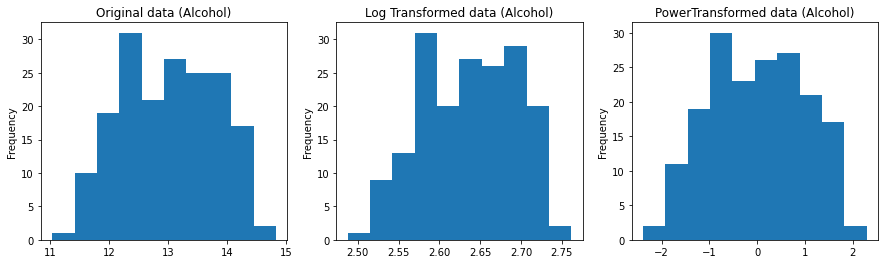

In [14]:
plot_transformed_data(data,'Alcohol')

In [133]:
def apply_log(column):
    # Ensure that all values are positive
    
    return np.log(column)



def apply_power_transform(df, column_name):
    # Select the column to transform
    column = df[column_name]
    
    # Create a PowerTransformer object
    transformer = PowerTransformer()
    
    # Fit and transform the column
    transformed_column = transformer.fit_transform(column.to_numpy().reshape(-1, 1))
    
    # Replace the original column with the transformed column
    df[column_name] = pd.Series(data=transformed_column.flatten(), index=df.index)
    
    # Return the modified dataframe
    return df

def apply_power_log_transform(df, column_name):
    # Select the column to transform
    column = df[column_name]
    
    # Create a PowerTransformer object
    transformer = PowerTransformer()
    
    # Fit and transform the column using the PowerTransformer
    transformed_column = transformer.fit_transform(column.to_numpy().reshape(-1, 1))
    
    # Apply the log transformation to the transformed column
    transformed_column = apply_log(transformed_column)
    
    # Replace the original column with the transformed column
    df[column_name] = pd.Series(data=transformed_column.flatten(), index=df.index)
    
    # Return the modified dataframe
    return df


In [134]:
def process_data(data):
    all_features = pd.DataFrame()
    metrics = pd.DataFrame(columns=['Original', 'Log transform', 'PowerTransformer', 'Log + PowerTransformer'])

    for col in data.columns:
        columns=['Feature']
        # Original data
        feature = data[col]
        norm_test = normality_test(feature)
        metrics.loc[col, 'Original'] = norm_test['p-value']
        
        # Log transform
        log_transformed_feature = apply_log(feature)
        norm_test = normality_test(log_transformed_feature)
        metrics.loc[col, 'Log transform'] = norm_test['p-value']
        
        # PowerTransformer
        feature = feature.to_numpy().reshape(-1,1)
        powtr = PowerTransformer()
        feature_transf = powtr.fit_transform(feature)
        array_1d = feature_transf.flatten()
        feature = pd.Series(data=array_1d, index=list(range(len(array_1d))))
        all_features[col] = feature
        norm_test = normality_test(feature)
        metrics.loc[col, 'PowerTransformer'] = norm_test['p-value']
        
        # Log + PowerTransformer
       
        log_transformed_feature = log_transformed_feature.to_numpy().reshape(-1,1)
        powtr = PowerTransformer()
        feature_transf = powtr.fit_transform(log_transformed_feature)
        array_1d = feature_transf.flatten()
        log_transformed_feature = pd.Series(data=array_1d, index=list(range(len(array_1d))))
        all_features[col + '_log_powertr'] = log_transformed_feature
        norm_test = normality_test(log_transformed_feature)
        metrics.loc[col, 'Log + PowerTransformer'] = norm_test['p-value']
        
    return metrics, all_features


In [135]:
metrics, all_features = process_data(data)

In [125]:
metrics

,Original,Log transform,PowerTransformer,Log + PowerTransformer
Alcohol,0.000342,0.000875,0.000304,0.00029
Malic_Acid,0.000003,0.012438,0.01748,0.262458
Ash,0.036316,0.000001,0.069216,0.098275
Ash_Alcanity,0.210043,0.006403,0.432393,0.459764
Magnesium,0.0,0.002126,0.992261,0.982616
Total_Phenols,0.000556,0.002395,0.000102,0.000029
Flavanoids,0.000127,0.000034,0.0,0.0
Nonflavanoid_Phenols,0.002665,0.119398,0.003187,0.033818
Proanthocyanins,0.008001,0.000124,0.935016,0.956326
Color_Intensity,0.000053,0.096125,0.036562,0.083473


In [126]:
def is_normal(row, alpha=0.05):
    return row.ge(alpha).any()

metrics['Normal'] = metrics.apply(is_normal, axis=1)
metrics.index.name = 'Feature'

In [127]:
metrics

,Original,Log transform,PowerTransformer,Log + PowerTransformer,Normal
Feature,,,,,
Alcohol,0.000342,0.000875,0.000304,0.00029,False
Malic_Acid,0.000003,0.012438,0.01748,0.262458,True
Ash,0.036316,0.000001,0.069216,0.098275,True
Ash_Alcanity,0.210043,0.006403,0.432393,0.459764,True
Magnesium,0.0,0.002126,0.992261,0.982616,True
Total_Phenols,0.000556,0.002395,0.000102,0.000029,False
Flavanoids,0.000127,0.000034,0.0,0.0,False
Nonflavanoid_Phenols,0.002665,0.119398,0.003187,0.033818,True
Proanthocyanins,0.008001,0.000124,0.935016,0.956326,True


In [136]:
data1 = data.copy()

In [137]:
data1 = apply_power_transform(data1,'Magnesium')

In [141]:
data1 = apply_power_transform(data1,'Alcohol')
data1 = apply_power_transform(data1,'Malic_Acid')
data1 = apply_power_transform(data1,'Ash')
data1 = apply_power_transform(data1,'Ash_Alcanity')
data1 = apply_power_transform(data1,'Magnesium')
data1 = apply_power_transform(data1,'Proanthocyanins')
data1 = apply_power_transform(data1,'Color_Intensity')
data1


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.530388,-0.435463,0.210464,-1.180400,1.685180,2.80,3.06,0.28,1.202701,0.451450,1.04,3.92,1065
1,0.238381,-0.338701,-0.839064,-2.663167,0.191196,2.65,2.76,0.26,-0.490487,-0.110974,1.05,3.40,1050
2,0.188751,0.318077,1.119290,-0.243437,0.264398,2.80,3.24,0.30,1.925646,0.467301,1.03,3.17,1185
3,1.708049,-0.121469,0.471827,-0.799464,1.020065,3.85,3.49,0.24,1.038972,1.182895,0.86,3.45,1480
4,0.288052,0.523699,1.903702,0.472612,1.279896,2.80,2.69,0.39,0.471707,-0.141340,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.874761,1.971560,0.284824,0.325633,-0.203868,1.68,0.61,0.52,-0.931816,1.153680,0.64,1.74,740
174,0.487148,1.353424,0.396838,1.049949,0.335822,1.80,0.75,0.43,-0.244461,1.032950,0.70,1.56,750
175,0.325332,1.516324,-0.411341,0.177532,1.376424,1.59,0.69,0.43,-0.356749,1.790358,0.59,1.56,835
176,0.201155,0.523699,-0.011100,0.177532,1.376424,1.65,0.68,0.53,-0.152471,1.581288,0.60,1.62,840


In [142]:
data1.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [147]:
calculate_skew_normality(data1)

,Feature,Skew,Absolute Skew,Skewed,normal,Normality
0,Alcohol,-0.021789,0.021789,False,3.039932e-04,False
1,Malic_Acid,0.072390,0.072390,False,1.748047e-02,False
2,Ash,0.042841,0.042841,False,6.921610e-02,True
3,Ash_Alcanity,0.016368,0.016368,False,4.323934e-01,True
4,Magnesium,-0.009726,0.009726,False,9.892841e-01,True
5,Total_Phenols,0.085907,0.085907,False,5.556667e-04,False
6,Flavanoids,0.025129,0.025129,False,1.269330e-04,False
7,Nonflavanoid_Phenols,0.446349,0.446349,False,2.664703e-03,False
8,Proanthocyanins,0.000524,0.000524,False,9.350160e-01,True
9,Color_Intensity,0.009783,0.009783,False,3.656164e-02,False


In [143]:
from sklearn.preprocessing import MinMaxScaler

In [148]:
scaler = MinMaxScaler()
X = scaler.fit_transform(data1)

In [149]:
from sklearn.cluster import KMeans

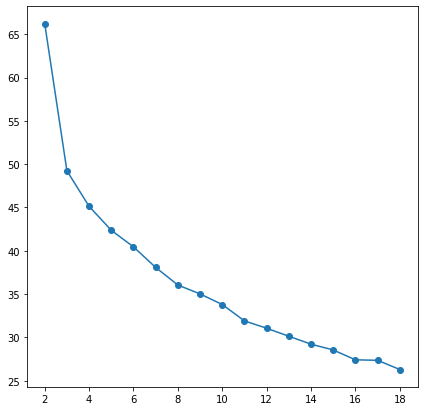

In [150]:
clusters_range=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
inertias=[]

for c in clusters_range:
    kmeans=KMeans(n_clusters=c, random_state=0).fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7,7))
plt.plot(clusters_range,inertias, marker='o')

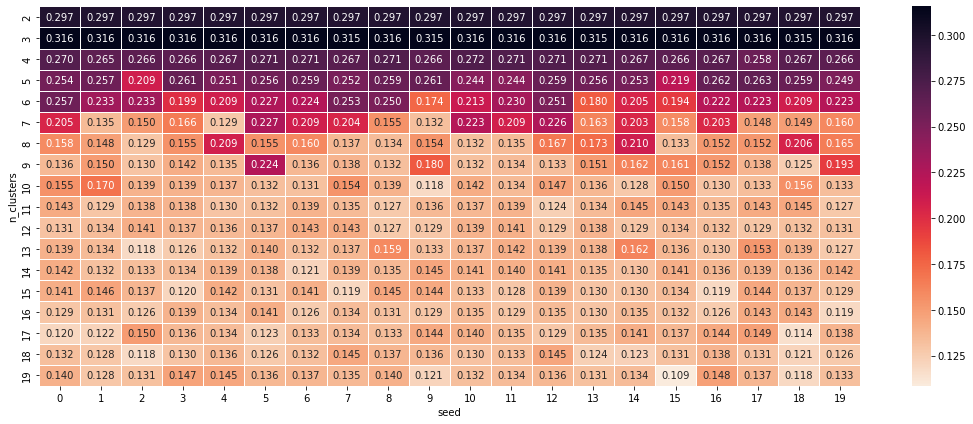

In [151]:
from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range=range(2, 20)
random_range  =range(0, 20)
results=[]

for c in clusters_range:
    for r in random_range:
        clusterer=KMeans(n_clusters=c, random_state=r)
        cluster_labels=clusterer.fit_predict(X)
        silhouette_avg=silhouette_score(X, cluster_labels)
        results.append([c,r,silhouette_avg])

result  =pd.DataFrame(results, columns=["n_clusters","seed","silhouette_score"])
pivot_km=pd.pivot_table(result, index="n_clusters", columns="seed",values="silhouette_score")

plt.figure(figsize=(15, 6))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

In [156]:
from sklearn.decomposition import PCA

In [157]:
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)

In [158]:
X_pca_df = pd.DataFrame(data=X_pca, columns=['X1', 'X2', 'X3'])

In [178]:
kmeans=KMeans(n_clusters=6, random_state=0).fit(X)

In [179]:
labels = kmeans.labels_
X_pca_df['Labels'] = labels

In [180]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [162]:
X_pca_df.head()

,X1,X2,X3,Labels
0,-0.706330,-0.266158,-0.023602,1
1,-0.479848,-0.026007,0.276266,1
2,-0.510662,-0.218113,-0.219062,5
3,-0.832897,-0.573227,-0.068030,5
4,-0.193524,-0.108950,-0.336036,3


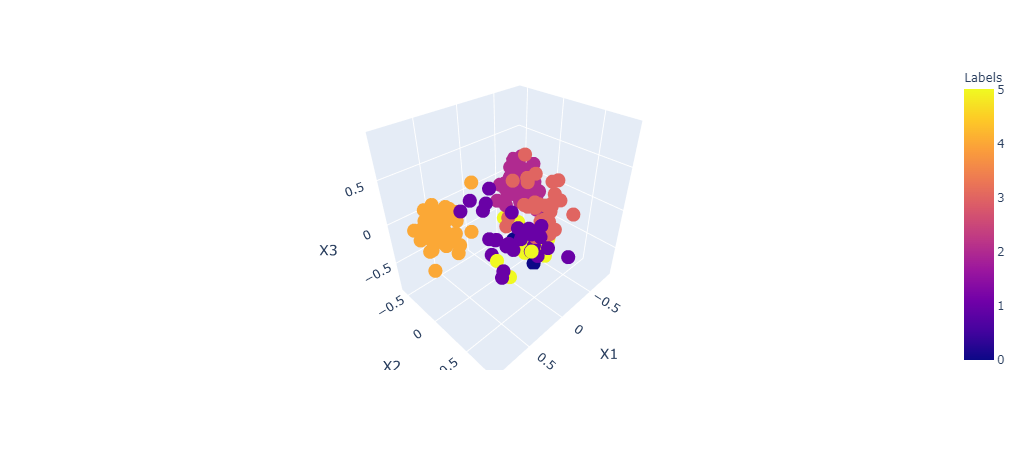

In [181]:
import plotly.express as px

fig = px.scatter_3d(X_pca_df, x='X1', y='X2', z='X3',
              color=X_pca_df['Labels'])
fig.show()

In [182]:
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [183]:
results_df = data.copy()
results_df['Labels'] = kmeans.labels_

results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Labels                178 non-null    int32  
dtypes: float64(11), int32(1), int64(2)
memory usage: 18.9 KB


In [184]:
summary = {}

for index in range(6):
    summary[index] = results_df[results_df['Labels'] == index].describe().T  # .describe method provides general statistics about the data

In [185]:
summary[0]

,count,mean,std,min,25%,50%,75%,max
Alcohol,4.0,12.7100,0.774037,11.56,12.6325,13.020,13.0975,13.24
Malic_Acid,4.0,2.0900,0.378418,1.67,1.9550,2.050,2.1850,2.59
Ash,4.0,2.9800,0.303645,2.60,2.8025,3.045,3.2225,3.23
Ash_Alcanity,4.0,26.1250,4.007805,21.00,24.0000,26.750,28.8750,30.00
Magnesium,4.0,125.0000,9.695360,118.00,118.7500,121.500,127.7500,139.00
Total_Phenols,4.0,2.9775,0.314788,2.63,2.7575,2.990,3.2100,3.30
Flavanoids,4.0,3.3350,1.167347,2.68,2.6875,2.790,3.4375,5.08
Nonflavanoid_Phenols,4.0,0.3850,0.122610,0.21,0.3450,0.430,0.4700,0.47
Proanthocyanins,4.0,1.8925,0.060759,1.82,1.8575,1.895,1.9300,1.96
Color_Intensity,4.0,4.3125,1.198704,3.35,3.5225,3.950,4.7400,6.00


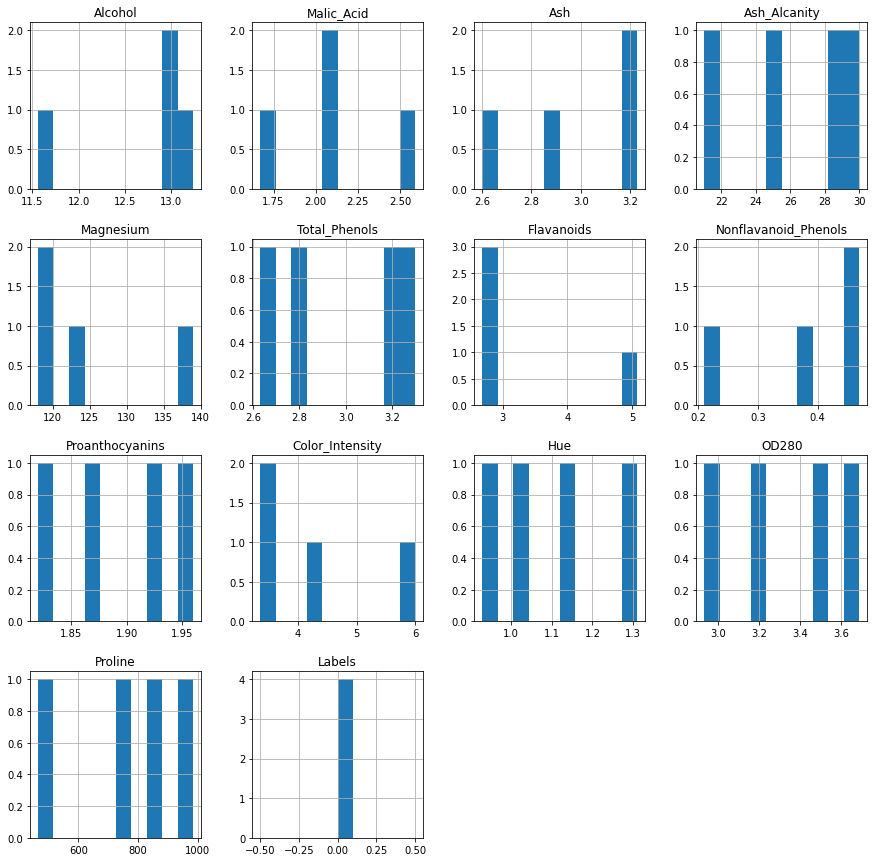

In [186]:
results_df[results_df['Labels'] == 0].hist(figsize=(15,15));

In [187]:
centroids = kmeans.cluster_centers_
pd.DataFrame(centroids, columns = results_df.columns[:13], index = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5'])

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
C0,0.433362,0.555432,0.850565,0.818913,0.804185,0.688793,0.631857,0.481132,0.573890,0.481574,0.506098,0.754579,0.339337
C1,0.275983,0.412500,0.483142,0.560820,0.418842,0.325332,0.276128,0.658926,0.378947,0.324892,0.492058,0.435897,0.171211
C2,0.722599,0.502621,0.538746,0.353841,0.631901,0.649872,0.564737,0.292802,0.573630,0.606727,0.474857,0.694546,0.617900
C3,0.366912,0.309510,0.363430,0.447105,0.503224,0.477408,0.384694,0.258295,0.505516,0.360059,0.513877,0.588986,0.211004
C4,0.550503,0.761912,0.532849,0.592679,0.543344,0.238142,0.099501,0.598768,0.316173,0.709175,0.166584,0.158481,0.245276
C5,0.330671,0.765475,0.460923,0.550669,0.459340,0.556250,0.450158,0.385613,0.579992,0.288908,0.348069,0.673535,0.138641


In [188]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

In [189]:
clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 7)

In [190]:
X_clusters = results_df.drop('Labels', axis=1)
y_clusters = results_df['Labels']

clf.fit(X_clusters, y_clusters)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=7)

In [191]:
from sklearn.metrics import classification_report, confusion_matrix

In [192]:
predictions = clf.predict(X_clusters)
print(classification_report(y_clusters, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.81      0.81      0.81        26
           2       0.92      0.89      0.91        54
           3       0.78      0.86      0.82        29
           4       0.98      0.92      0.95        49
           5       0.68      0.94      0.79        16

    accuracy                           0.87       178
   macro avg       0.70      0.74      0.71       178
weighted avg       0.86      0.87      0.86       178



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



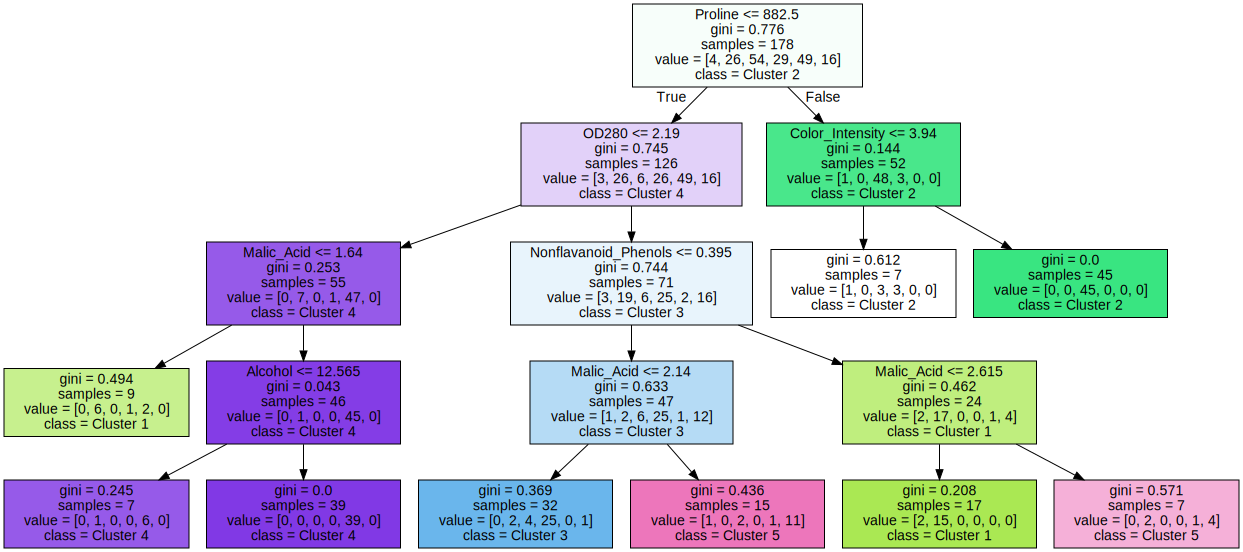

In [193]:
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=results_df.columns[:13],  
                                class_names=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5','Cluster 6','Cluster 7'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph
#plt.savefig('DecisionTree.png')